In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read data.

In [23]:
EXPERIMENT_NAME = 'pca_1000' # Change to correct name.

X_train = np.load('X_train_'+EXPERIMENT_NAME+'.npy')
X_val = np.load('X_val_'+EXPERIMENT_NAME+'.npy')
X_test = np.load('X_test_'+EXPERIMENT_NAME+'.npy')

y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')
y_test = np.load('y_test.npy')

In [24]:
from sklearn.preprocessing import robust_scale

X_train = robust_scale(X_train)
X_val = robust_scale(X_val)

In [4]:
import sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import keras
from sklearn.cross_validation import train_test_split
from keras import regularizers
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.
/afs/inf.ed.ac.uk/user/s17/s1719186/miniconda3/envs/dme/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Callback AUC.

In [5]:
class roc_callback(keras.callbacks.Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x)
        y_pred_val = self.model.predict(self.x_val)
        logs['churn-auc'] = []
        logs['churn-auc_val'] = []
        logs['appetency-auc'] = []
        logs['appetency-auc_val'] = []
        logs['upselling-auc'] = []
        logs['upselling-auc_val'] = []
        logs['other-auc'] = []
        logs['other-auc_val'] = []
        logs['whole-auc'] = []
        logs['whole-auc_val'] = []

        for i in range(4):
            auc = roc_auc_score(self.y[:,i], y_pred[:,i])
            auc_val = roc_auc_score(self.y_val[:,i], y_pred_val[:,i])
            if i == 0:
                logs['churn-auc'].append(auc)
                logs['churn-auc_val'].append(auc_val)
                print('\rchurn-auc: %s - churn-auc_val: %s' % (str(round(auc,4)),str(round(auc_val,4))),end=100*' '+'\n')
            elif i == 1:
                logs['appetency-auc'].append(auc)
                logs['appetency-auc_val'].append(auc_val)
                print('\rappetency-auc: %s - appetency-auc_val: %s' % (str(round(auc,4)),str(round(auc_val,4))),end=100*' '+'\n')
            elif i == 2:
                logs['upselling-auc'].append(auc)
                logs['upselling-auc_val'].append(auc_val)
                print('\rupselling-auc: %s - upselling-auc_val: %s' % (str(round(auc,4)),str(round(auc_val,4))),end=100*' '+'\n')
            else:
                logs['other-auc'].append(auc)
                logs['other-auc_val'].append(auc_val)
                print('\rother-auc: %s - other-auc_val: %s' % (str(round(auc,4)),str(round(auc_val,4))),end=100*' '+'\n')
        
        whole_auc = roc_auc_score(self.y, y_pred)
        whole_auc_val = roc_auc_score(self.y_val, y_pred_val)
        logs['whole-auc'].append(whole_auc)
        logs['whole-auc_val'].append(whole_auc_val)
        print('\rwhole-auc: %s - whole-auc_val: %s' % (str(round(whole_auc,4)),str(round(whole_auc_val,4))),end=100*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

Build the model.

In [21]:
INPUT_DIM = 1000 # Change to the correct dimension of inputs.

model = Sequential()

model.add(Dense(units=128, activation='relu', input_dim=1000, kernel_initializer=keras.initializers.glorot_normal(seed=None), kernel_regularizer=regularizers.l2(0.01)))
keras.layers.Dropout(0.1, noise_shape=None, seed=None)
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

model.add(Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
keras.layers.Dropout(0.1, noise_shape=None, seed=None)
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

model.add(Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
keras.layers.Dropout(0.1, noise_shape=None, seed=None)
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

model.add(Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
keras.layers.Dropout(0.1, noise_shape=None, seed=None)
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

model.add(Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
keras.layers.Dropout(0.1, noise_shape=None, seed=None)
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

# model.add(Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
# keras.layers.Dropout(0.5, noise_shape=None, seed=None)
# keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

# model.add(Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
# keras.layers.Dropout(0.5, noise_shape=None, seed=None)
# keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

model.add(Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

Deal with outliers and run experiments.

In [25]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=512, callbacks=[roc_callback(training_data=(X_train, y_train),validation_data=(X_val, y_val))])
print(history.history.keys())

Train on 40000 samples, validate on 5000 samples
Epoch 1/150
40000/40000 [==============================] - 1s 18us/step - loss: 3.9498 - acc: 0.8344 - val_loss: 3.7337 - val_acc: 0.8328
churn-auc: 0.7162 - churn-auc_val: 0.6502                                                                                                    
appetency-auc: 0.6629 - appetency-auc_val: 0.5504                                                                                                    
upselling-auc: 0.6429 - upselling-auc_val: 0.5109                                                                                                    
other-auc: 0.6972 - other-auc_val: 0.5976                                                                                                    
whole-auc: 0.6798 - whole-auc_val: 0.5773                                                                                                    
Epoch 2/150
40000/40000 [==============================] - 1s 19us/step - loss: 3.4621 

40000/40000 [==============================] - 1s 19us/step - loss: 1.2585 - acc: 0.8353 - val_loss: 1.3108 - val_acc: 0.8326
churn-auc: 0.8769 - churn-auc_val: 0.6919                                                                                                    
appetency-auc: 0.7735 - appetency-auc_val: 0.561                                                                                                    
upselling-auc: 0.8305 - upselling-auc_val: 0.5478                                                                                                    
other-auc: 0.8629 - other-auc_val: 0.6313                                                                                                    
whole-auc: 0.836 - whole-auc_val: 0.608                                                                                                    
Epoch 12/150
40000/40000 [==============================] - 1s 18us/step - loss: 1.1503 - acc: 0.8362 - val_loss: 1.2243 - val_acc: 0.8316
churn-auc: 0

40000/40000 [==============================] - 1s 20us/step - loss: 0.6093 - acc: 0.8732 - val_loss: 1.0378 - val_acc: 0.8166
churn-auc: 0.9448 - churn-auc_val: 0.6389                                                                                                    
appetency-auc: 0.9154 - appetency-auc_val: 0.5507                                                                                                    
upselling-auc: 0.9289 - upselling-auc_val: 0.5279                                                                                                    
other-auc: 0.9803 - other-auc_val: 0.5984                                                                                                    
whole-auc: 0.9423 - whole-auc_val: 0.579                                                                                                    
Epoch 22/150
40000/40000 [==============================] - 1s 19us/step - loss: 0.5840 - acc: 0.8776 - val_loss: 1.0397 - val_acc: 0.8160
churn-auc:

40000/40000 [==============================] - 1s 19us/step - loss: 0.4559 - acc: 0.8961 - val_loss: 1.0847 - val_acc: 0.8032
churn-auc: 0.9563 - churn-auc_val: 0.6354                                                                                                    
appetency-auc: 0.9409 - appetency-auc_val: 0.5482                                                                                                    
upselling-auc: 0.93 - upselling-auc_val: 0.5414                                                                                                    
other-auc: 0.9942 - other-auc_val: 0.5968                                                                                                    
whole-auc: 0.9554 - whole-auc_val: 0.5804                                                                                                    
Epoch 32/150
40000/40000 [==============================] - 1s 19us/step - loss: 0.4463 - acc: 0.8986 - val_loss: 1.1004 - val_acc: 0.8022
churn-auc: 

40000/40000 [==============================] - 1s 20us/step - loss: 0.4118 - acc: 0.9080 - val_loss: 1.1424 - val_acc: 0.8044
churn-auc: 0.9654 - churn-auc_val: 0.633                                                                                                    
appetency-auc: 0.9429 - appetency-auc_val: 0.5477                                                                                                    
upselling-auc: 0.9244 - upselling-auc_val: 0.5196                                                                                                    
other-auc: 0.9976 - other-auc_val: 0.593                                                                                                    
whole-auc: 0.9575 - whole-auc_val: 0.5733                                                                                                    
Epoch 42/150
40000/40000 [==============================] - 1s 19us/step - loss: 0.4061 - acc: 0.9120 - val_loss: 1.1374 - val_acc: 0.8022
churn-auc: 

KeyboardInterrupt: 

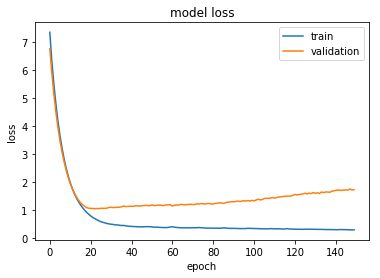

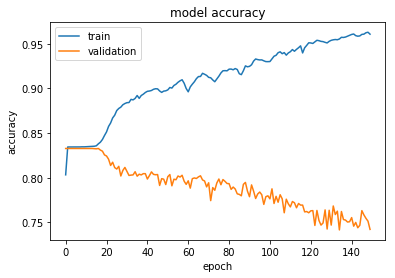

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

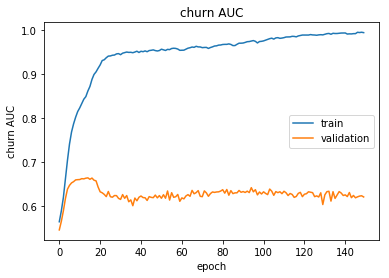

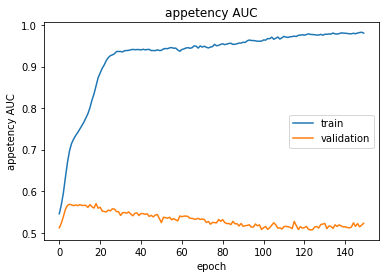

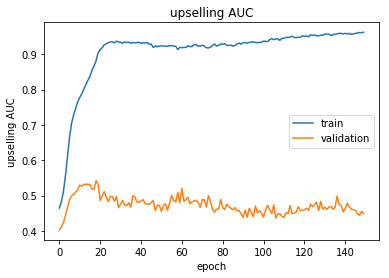

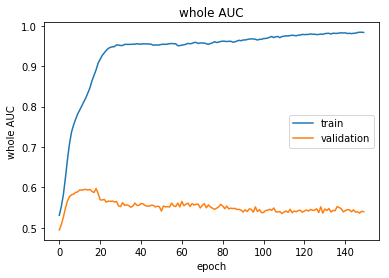

In [17]:
# summarize history for churn AUC:
plt.plot(history.history['churn-auc'])
plt.plot(history.history['churn-auc_val'])
plt.title('churn AUC')
plt.ylabel('churn AUC')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()
# summarize history for appetency AUC:
plt.plot(history.history['appetency-auc'])
plt.plot(history.history['appetency-auc_val'])
plt.title('appetency AUC')
plt.ylabel('appetency AUC')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()
# summarize history for upselling AUC:
plt.plot(history.history['upselling-auc'])
plt.plot(history.history['upselling-auc_val'])
plt.title('upselling AUC')
plt.ylabel('upselling AUC')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()
# summarize history for whole AUC:
plt.plot(history.history['whole-auc'])
plt.plot(history.history['whole-auc_val'])
plt.title('whole AUC')
plt.ylabel('whole AUC')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [20]:
results = ['loss', 'val_loss', 'acc', 'val_acc',
           'churn-auc', 'churn-auc_val', 'appetency-auc',
           'appetency-auc_val', 'upselling-auc', 'upselling-auc_val',
          'other-auc', 'other-auc_val', 'whole-auc', 'whole-auc_val']
for result in results:
    np.save(EXPERIMENT_NAME+'_'+result, history.history[result])